In [85]:
import numpy as np
import pandas as pd

In [86]:
#Only execute this cell if the directory in which your dataset is different from the directory that you are running the
#Jupyter Notebook

import os
os.chdir('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\Week14_Random_Forest')

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
bank_df = pd.read_csv("azcabgptca.csv")
bank_df.head()

,Unnamed: 0,died,procedure,age,gender,los,type
0,1,0,1,73,0,51,0
1,2,0,0,67,0,30,1
2,3,0,1,69,0,43,0
3,4,0,1,65,0,32,0
4,5,0,1,79,0,42,1


In [123]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1959 non-null   int64
 1   procedure   1959 non-null   int64
 2   age         1959 non-null   int64
 3   gender      1959 non-null   int64
 4   los         1959 non-null   int64
 5   type        1959 non-null   int64
dtypes: int64(6)
memory usage: 92.0 KB


In [129]:
import seaborn as sns
sns.countplot(data=bank_df["died"])

KeyError: 'died'

In [90]:
bank_df.shape

(1959, 7)

In [91]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in bank_df.columns: 
    if bank_df[feature].dtype == 'object':
        bank_df[feature] = pd.Categorical(bank_df[feature]).codes 

In [92]:
# capture the target column ("default") into separate vectors for training set and test set

X = bank_df.drop(["Unnamed: 0","died"] , axis=1)

y = bank_df.pop("died")

In [130]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)


In [134]:
rfcl = RandomForestClassifier(n_estimators = 500, random_state=0)
rfcl = rfcl.fit(X_train, train_labels)

In [135]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)
ytrain_predict_prob = rfcl.predict_proba(X_train)
ytest_predict_prob = rfcl.predict_proba(X_test)

In [136]:
from sklearn.metrics import confusion_matrix,classification_report

In [137]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by="Imp"))


                Imp
gender     0.040560
type       0.055163
procedure  0.072604
age        0.244969
los        0.586704


In [151]:
rfcl.score(X_test,test_labels)

0.9863945578231292

In [139]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [140]:
confusion_matrix(train_labels,ytrain_predict)

array([[1346,    0],
       [  10,   15]], dtype=int64)

In [141]:
confusion_matrix(test_labels,ytest_predict)

array([[575,   2],
       [  6,   5]], dtype=int64)

In [142]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1346
           1       1.00      0.60      0.75        25

    accuracy                           0.99      1371
   macro avg       1.00      0.80      0.87      1371
weighted avg       0.99      0.99      0.99      1371



In [143]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       577
           1       0.71      0.45      0.56        11

    accuracy                           0.99       588
   macro avg       0.85      0.73      0.77       588
weighted avg       0.98      0.99      0.98       588



In [144]:
import matplotlib.pyplot as plt

AUC: 0.500


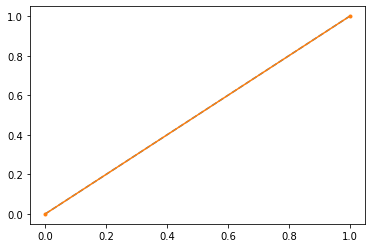

In [145]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.500


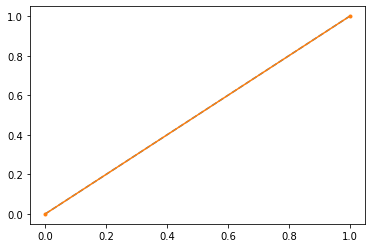

In [156]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

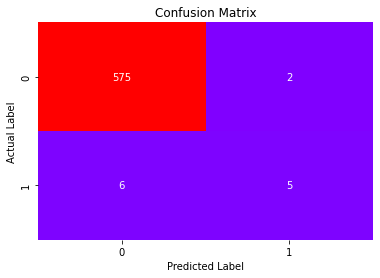

In [153]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.792


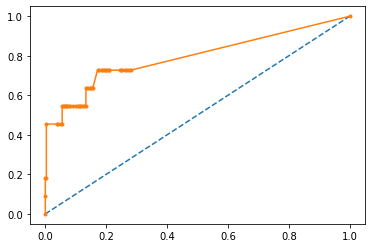

In [155]:
probs = rfcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [158]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       577
           1       0.71      0.45      0.56        11

    accuracy                           0.99       588
   macro avg       0.85      0.73      0.77       588
weighted avg       0.98      0.99      0.98       588

